# Steps for prepocessing
1.import the necessary libraries
2.import the dataset
3.Handling the null values(churn-leaving the company)
4.Separate dependent and independent variables(dep-out,indep-input)
5.Encoding
6.Splitting into training and testing set
7.Feature scaling

## P Resshmi    VIT-AP 

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


## 1.Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. import the dataset 

In [4]:
#(.csv, .tsv, json, .excel)
dataset=pd.read_csv("Titanic-Dataset.csv")

In [5]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
dataset.tail() #default last 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
dataset.shape

(891, 12)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


exited- dependent variable--output

inputs--independent variables

In [11]:
numeric_dataset = dataset.select_dtypes(include=[np.number])
numeric_dataset.corr()
#we can write datset.corr() or dataset.select_dtypes(include=[np.number]).corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

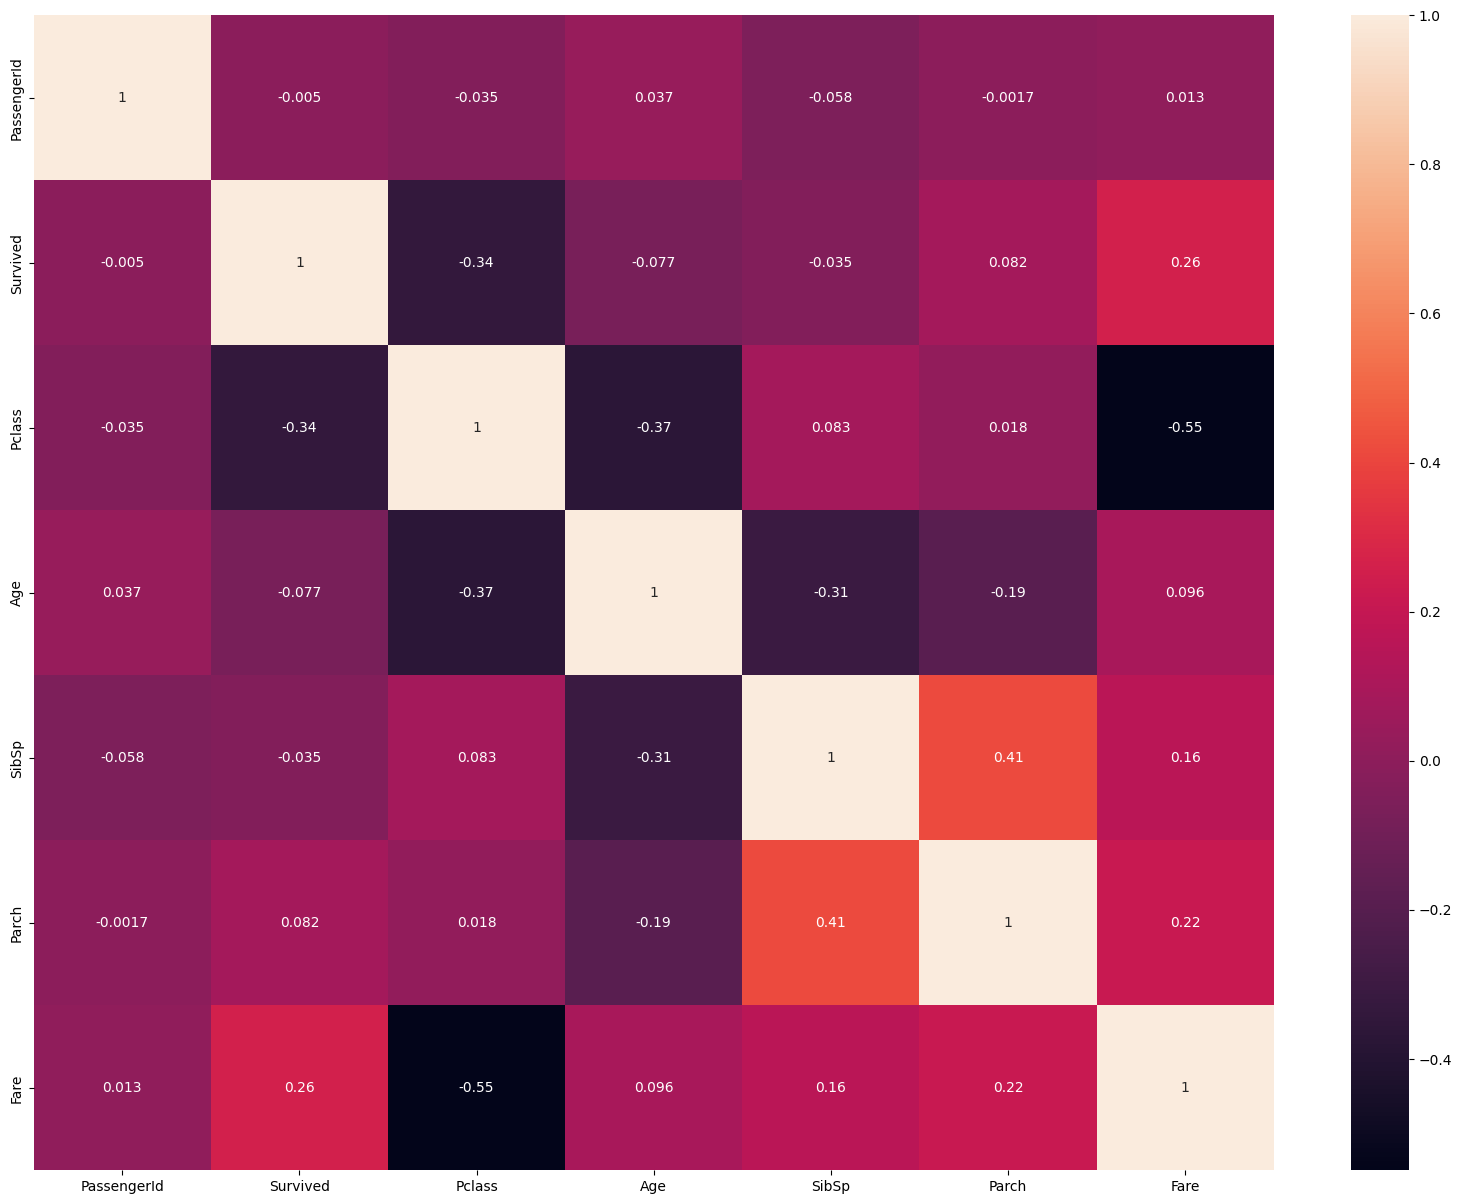

In [16]:
plt.subplots(figsize=(20,15))
sns.heatmap(numeric_dataset.corr(),annot = True)

In [17]:
dataset.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

## 3.Handling null values

In [18]:
dataset.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [19]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4.outliers

<Axes: >

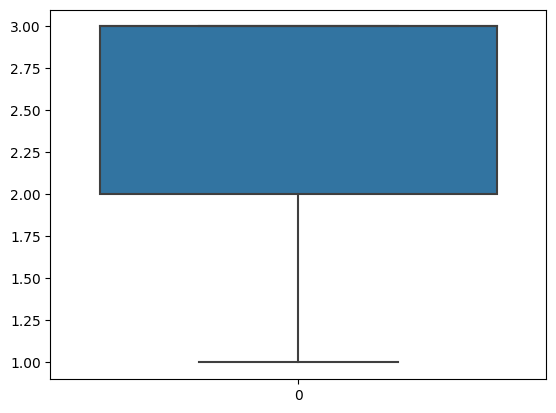

In [21]:
sns.boxplot(dataset.Pclass)

## 5.Seperate dependent and independent variables

In [26]:
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,3:14]
print(x.head())
print(x.tail())

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
                                         Name     Sex   Age  SibSp  Parch  \
886                     Montvila, Rev. Juozas    male  27.0      0      0   
887              Graham, Miss. Margaret Edith  female  19.0      

In [27]:
print(y.head())
print(y.tail())

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
                                         Name     Sex   Age  SibSp  Parch  \
886                     Montvila, Rev. Juozas    male  27.0      0      0   
887              Graham, Miss. Margaret Edith  female  19.0      

In [28]:
print(dataset.shape)
print(x.shape)
print(y.shape)

(891, 12)
(891, 9)
(891, 9)


## 6.Encoding

In [29]:
#(Categorical colums=gender and geography)
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()

In [33]:
x["Age"]=le.fit_transform(x["Age"])
x["Age"]

0      28
1      51
2      34
3      47
4      47
       ..
886    35
887    24
888    88
889    34
890    42
Name: Age, Length: 891, dtype: int64

In [35]:
x["Age"].value_counts()

Age
88    177
31     30
28     27
23     26
36     25
     ... 
49      1
71      1
4       1
30      1
86      1
Name: count, Length: 89, dtype: int64

In [36]:
x["Age"].nunique()

89

In [37]:
x.head()

,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,28,1,0,A/5 21171,7.2500,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,51,1,0,PC 17599,71.2833,C85,C
2,"Heikkinen, Miss. Laina",female,34,0,0,STON/O2. 3101282,7.9250,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,47,1,0,113803,53.1000,C123,S
4,"Allen, Mr. William Henry",male,47,0,0,373450,8.0500,NaN,S


One hot encoding on geography column

In [38]:
x.shape

(891, 9)

In [41]:
SibSp=pd.get_dummies(x["SibSp"],drop_first=True)
SibSp

,1,2,3,4,5,8
0,True,False,False,False,False,False
1,True,False,False,False,False,False
2,False,False,False,False,False,False
3,True,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
886,False,False,False,False,False,False
887,False,False,False,False,False,False
888,True,False,False,False,False,False
889,False,False,False,False,False,False


In [45]:
x1=pd.concat([x,SibSp],axis=1)
x1

,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3,4,5,8
0,"Braund, Mr. Owen Harris",male,28,1,0,A/5 21171,7.2500,NaN,S,True,False,False,False,False,False
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,51,1,0,PC 17599,71.2833,C85,C,True,False,False,False,False,False
2,"Heikkinen, Miss. Laina",female,34,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,False,False,False,False
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,47,1,0,113803,53.1000,C123,S,True,False,False,False,False,False
4,"Allen, Mr. William Henry",male,47,0,0,373450,8.0500,NaN,S,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,35,0,0,211536,13.0000,NaN,S,False,False,False,False,False,False
887,"Graham, Miss. Margaret Edith",female,24,0,0,112053,30.0000,B42,S,False,False,False,False,False,False
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,88,1,2,W./C. 6607,23.4500,NaN,S,True,False,False,False,False,False
889,"Behr, Mr. Karl Howell",male,34,0,0,111369,30.0000,C148,C,False,False,False,False,False,False


In [48]:
x.drop(["Name"],axis=1,inplace=True)
x.head()

,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked
0,male,28,0,A/5 21171,7.2500,NaN,S
1,female,51,0,PC 17599,71.2833,C85,C
2,female,34,0,STON/O2. 3101282,7.9250,NaN,S
3,female,47,0,113803,53.1000,C123,S
4,male,47,0,373450,8.0500,NaN,S


In [49]:
x.shape

(891, 7)

## 7.splitting into training and testing set

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((623, 7), (268, 7), (623, 9), (268, 9))

## 8.Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
x_train = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_test = scaler.transform(x_test)


ValueError: could not convert string to float: 'male'